In [2]:
import random
NUM_ACTIONS

In [11]:
class RockPaperScissors():
    def __init__(self):
        self.NUM_ACTIONS = 3
        self.regretSum = [0] * self.NUM_ACTIONS
        self.strategy = [0] * self.NUM_ACTIONS
        self.strategySum = [0] * self.NUM_ACTIONS

    def getStrategy(self):
        normalizingSum = 0
        for a in range(self.NUM_ACTIONS):
            if self.regretSum[a] > 0:
                self.strategy[a] = self.regretSum[a]
            else: 
                self.strategy[a] = 0
            normalizingSum += self.strategy[a]
        for a in range(self.NUM_ACTIONS):
            if normalizingSum > 0:
                self.strategy[a] /= normalizingSum
            else:
                self.strategy[a] = 1/self.NUM_ACTIONS
            self.strategySum[a] += self.strategy[a]
        return self.strategy
    
    def getAction(self, strategy):
        a = 0; cumulativeProb = 0
        r = random.random()
        while a < self.NUM_ACTIONS - 1:
            cumulativeProb += strategy[a]
            if r < cumulativeProb:
                break
            a += 1
        return a
    
    def train(self, myAction, otherAction):
        actionUtility = [0] * self.NUM_ACTIONS
        actionUtility[otherAction] = 0
        if otherAction == 0:
            actionUtility[1] = 1
            actionUtility[2] = -1
        elif otherAction == 1:
            actionUtility[0] = -1
            actionUtility[2] = 1
        elif otherAction == 2:
            actionUtility[0] = 1
            actionUtility[1] = -1
        for a in range(self.NUM_ACTIONS):
            self.regretSum[a] += actionUtility[a] - actionUtility[myAction]

    def getAverageStrategy(self):
        avgStrategy = [0] * self.NUM_ACTIONS
        normalizingSum = 0
        for a in range(self.NUM_ACTIONS):
            normalizingSum += self.strategySum[a]
        for a in range(self.NUM_ACTIONS):
            if normalizingSum > 0:
                avgStrategy[a] = self.strategySum[a]/normalizingSum
            else:
                avgStrategy[a] = 1/self.NUM_ACTIONS
        return avgStrategy

In [12]:
a = RockPaperScissors()
b = RockPaperScissors()
tracker = []
for i in range(10000):
    tracker.append(a.getAverageStrategy())
    aAction = a.getAction(a.getStrategy())
    bAction = b.getAction(b.getStrategy())
    a.train(aAction, bAction)
    b.train(bAction, aAction)

In [13]:
a = RockPaperScissors()
b = RockPaperScissors()
tracker = []
for i in range(10000):
    tracker.append(a.getAverageStrategy())
    aAction = a.getAction(a.getStrategy())
    bAction = b.getAction([0.4, 0.3, 0.3])
    a.train(aAction, bAction)

In [14]:
print(a.getAverageStrategy())
print(b.getAverageStrategy())

[0.006730266723543586, 0.9922297332764565, 0.0010399999999999997]
[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


In [320]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

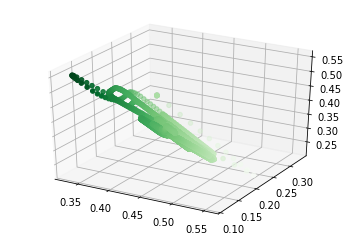

In [321]:
ax = plt.axes(projection='3d')

ax.scatter3D([x[0] for x in tracker], [x[1] for x in tracker], [x[2] for x in tracker], c=[x[2] for x in tracker], cmap='Greens');

In [311]:
print(a.getAverageStrategy())
print(b.getAverageStrategy())

[0.3329184839531652, 0.33249232334852413, 0.33458919269831067]
[0.3320308021193496, 0.33257302602786415, 0.3353961718527862]


In [233]:
c = RockPaperScissors()
d = RockPaperScissors()
tracker = []
for i in range(100):
    cAction = c.getAction(c.getStrategy())
    dAction = d.getAction([0.3, 0.4, 0.3])
    c.train(cAction, dAction)
    tracker.append(c.getStrategy())

In [230]:
print(c.getAverageStrategy())

[0.6118195217636393, 0.25930924630924646, 0.12887123192711425]


In [30]:
getAverageStrategy()

[0.0940013039545125, 0.0440209471158669, 0.8619777489296206]

In [55]:
actionUtility = [0] * NUM_ACTIONS

In [ ]:
myStrategy = getStrategy()
myAction = getAction(myStrategy)
otherAction = getAction(oppStrategy)

actionUtility[otherAction] = 0
if otherAction == 0:
    actionUtility[1] = 1
    actionUtility[2] = -1
elif otherAction == 1:
    actionUtility[0] = -1
    actionUtility[2] = 1
elif otherAction == 2:
    actionUtility[0] = 1
    actionUtility[1] = -2

for a in range(NUM_ACTIONS):
    regretSum[a] += actionUtility[a] - actionUtility[myAction]